In [1]:
from google.colab import files
import zipfile
import os

# Upload the dataset
uploaded = files.upload()  # Select your zipped dataset

# Extract the dataset
dataset_zip = list(uploaded.keys())[0]  # Get the uploaded file name
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to /content/dataset

# Check extracted files
os.listdir('/content/dataset')


Saving imagedataset.zip to imagedataset.zip


['Datasets']

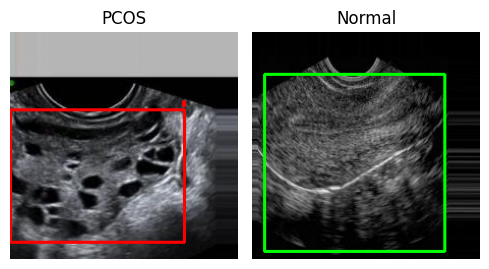

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to visualize one PCOS and one Normal image in a row
def visualize_pcos_and_normal(image_folder, label_folder):
    pcos_image = None
    normal_image = None

    # Find one PCOS and one Normal image
    for label_name in os.listdir(label_folder):
        label_path = os.path.join(label_folder, label_name)
        with open(label_path, "r") as file:
            for line in file.readlines():
                values = line.strip().split()
                class_id = int(values[0])  # First value in YOLO format is class ID

                image_name = os.path.splitext(label_name)[0] + ".jpg"

                if class_id == 1 and pcos_image is None:
                    pcos_image = image_name
                elif class_id == 0 and normal_image is None:
                    normal_image = image_name

                if pcos_image and normal_image:
                    break  # Stop when both images are found

        if pcos_image and normal_image:
            break  # Stop looping when both images are selected

    # Initialize figure for side-by-side display
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))

    # Visualize the selected images
    for ax, img_name, class_label in zip(axes, [pcos_image, normal_image], ["PCOS", "Normal"]):
        if img_name is None:
            print(f"⚠ No {class_label} image found!")
            ax.axis("off")
            continue

        image_path = os.path.join(image_folder, img_name)
        label_path = os.path.join(label_folder, os.path.splitext(img_name)[0] + ".txt")

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        height, width, _ = image.shape

        # Draw bounding boxes
        with open(label_path, "r") as file:
            for line in file.readlines():
                values = line.strip().split()
                class_id, x_center, y_center, w, h = map(float, values)

                # Convert YOLO format to pixel values
                x1 = int((x_center - w / 2) * width)
                y1 = int((y_center - h / 2) * height)
                x2 = int((x_center + w / 2) * width)
                y2 = int((y_center + h / 2) * height)

                # Set color: Red for PCOS, Green for Normal
                color = (255, 0, 0) if class_label == "PCOS" else (0, 255, 0)

                # Draw bounding box
                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Show the image
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(class_label)

    plt.tight_layout()
    plt.show()

# Define paths
train_images_path = "/content/dataset/Datasets/train/images"  # Change to your actual image folder
train_labels_path = "/content/dataset/Datasets/train/labels"  # Change to your actual label folder

# Run visualization
visualize_pcos_and_normal(train_images_path, train_labels_path)


In [3]:
import cv2
import numpy as np
import os

# Define input and output directories
input_dir = "/content/dataset/Datasets/train/images"
output_dir = "/content/dataset/Datasets/train/preprocessed_images"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all images in the dataset
for img_name in os.listdir(input_dir):
    if img_name.endswith(".jpg") or img_name.endswith(".png"):
        img_path = os.path.join(input_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

        # 1️⃣ Intensity Transformation (Adjust contrast)
        img_contrast = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

        # 2️⃣ Histogram Equalization (Enhance contrast)
        img_hist_eq = cv2.equalizeHist(img_contrast)

        # Save the processed image
        output_path = os.path.join(output_dir, img_name)
        cv2.imwrite(output_path,  img_hist_eq)  # Save final processed image

        print(f"Processed: {img_name}")

print("Preprocessing complete! Processed images saved in:", output_dir)


Processed: img_0_1553_jpg.rf.3b01cd9e575b2671ac8ee4d9787a1e6d.jpg
Processed: img_0_2245_jpg.rf.edfc6b338385536d25e6596f017fff7c.jpg
Processed: img_0_6854_jpg.rf.975ece9e619c8cdbfe6d6326299d45fa.jpg
Processed: img_0_1886_jpg.rf.41a86759746ddabc83c96231f1532142.jpg
Processed: img_0_1589_jpg.rf.223429526ed132feecd3ed7220ad827f.jpg
Processed: img_0_6993_jpg.rf.5fa3d0b70bbafd5f0a00989a4dbd1376.jpg
Processed: img_0_699_jpg.rf.d4713ac57179b0b74c1f7e97a5b94f31.jpg
Processed: img_0_6811_jpg.rf.c7e7325978aedbd0e85ff5c88bc95750.jpg
Processed: img_0_1877_jpg.rf.61a4a3d7acdba394e71ce1f875df387d.jpg
Processed: img_0_2137_jpg.rf.72ed4dfdb77f96a4dc250c5e8d75f4a6.jpg
Processed: img_0_2019_jpg.rf.4b0de48ff1b77838ac01930a4f61c0fc.jpg
Processed: img_0_2276_jpg.rf.c85e734000fa6963e99e68cc3d81e0a3.jpg
Processed: img_0_1854_jpg.rf.78000e9c2d9fcd2ed691a32c4e62bb97.jpg
Processed: img_0_1087_jpg.rf.f11f8d57bb67d57da8674008e4f443e7.jpg
Processed: img_0_1560_jpg.rf.9d22b59921fe103360f217ef2ab99413.jpg
Processed: 

In [4]:
import os
import cv2
import numpy as np
import random
from datetime import datetime
from shutil import copy2

# Input directories
image_dir = r'/content/dataset/Datasets/train/images'
label_dir = r'/content/dataset/Datasets/train/labels'

# Output directories
output_image_dir = r'/content/dataset/Datasets/augmented/images'
output_label_dir = r'/content/dataset/Datasets/augmented/labels'

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Desired target images per class
TARGET_IMAGES_PER_CLASS = 500

# Count class distribution
def count_class_distribution(label_dir):
    class_counts = {'0': 0, '1': 0}
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_id = line.strip().split()[0]  # Extract class ID
                    if class_id in class_counts:
                        class_counts[class_id] += 1
    return class_counts

# Read YOLO labels
def read_yolo_labels(label_path):
    bboxes = []
    with open(label_path, "r") as f:
        for line in f:
            values = line.strip().split()
            class_id = int(values[0])
            x_center, y_center, width, height = map(float, values[1:])
            bboxes.append([class_id, x_center, y_center, width, height])
    return bboxes

# Save YOLO label files
def save_yolo_labels(label_path, bboxes):
    with open(label_path, "w") as f:
        for bbox in bboxes:
            f.write(f"{int(bbox[0])} {bbox[1]:.6f} {bbox[2]:.6f} {bbox[3]:.6f} {bbox[4]:.6f}\n")

# Augmentation functions
def flip_image(image, direction="horizontal"):
    if direction == "horizontal":
        return cv2.flip(image, 1), "flip_horizontal"
    elif direction == "vertical":
        return cv2.flip(image, 0), "flip_vertical"
    return image, None

def translate_image(image):
    tx, ty = random.randint(-10, 10), random.randint(-10, 10)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_img, "translate"

def scale_image(image):
    scale_x, scale_y = 1.1, 1.1
    height, width = image.shape[:2]
    scaled_img = cv2.resize(image, (int(width * scale_x), int(height * scale_y)))
    scaled_img = cv2.resize(scaled_img, (width, height))  # Resize back to original
    return scaled_img, "scale"

# Function to adjust bounding boxes
def adjust_bboxes(bboxes, transform_type):
    updated_bboxes = []
    for bbox in bboxes:
        class_id, x_center, y_center, width, height = bbox
        if transform_type == "flip_horizontal":
            x_center = 1 - x_center
        elif transform_type == "flip_vertical":
            y_center = 1 - y_center
        elif transform_type == "translate":
            tx, ty = random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)
            x_center += tx
            y_center += ty
            x_center, y_center = min(1.0, max(0.0, x_center)), min(1.0, max(0.0, y_center))
        updated_bboxes.append([class_id, x_center, y_center, width, height])
    return updated_bboxes

# Process dataset with increased augmentation
def process_dataset():
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

    # Get current class distribution
    class_counts = count_class_distribution(label_dir)
    class_aug_counts = class_counts.copy()  # Track augmented counts

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(label_path):
            image = cv2.imread(image_path)
            bboxes = read_yolo_labels(label_path)
            class_id = str(bboxes[0][0])  # Get class of image

            # Save original image & label
            orig_image_save_path = os.path.join(output_image_dir, image_file)
            orig_label_save_path = os.path.join(output_label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))
            cv2.imwrite(orig_image_save_path, image)
            copy2(label_path, orig_label_save_path)

            # Augment images until each class reaches the target count
            while class_aug_counts[class_id] < TARGET_IMAGES_PER_CLASS:
                for aug_func in [flip_image, translate_image, scale_image]:  # Apply multiple augmentations
                    aug_image, transform_type = aug_func(image)

                    if transform_type:
                        aug_bboxes = adjust_bboxes(bboxes, transform_type)
                    else:
                        aug_bboxes = bboxes

                    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
                    new_filename = f"aug_{timestamp}_{random.randint(1000,9999)}.jpg"
                    new_labelname = new_filename.replace('.jpg', '.txt')

                    # Save augmented image & label
                    cv2.imwrite(os.path.join(output_image_dir, new_filename), aug_image)
                    save_yolo_labels(os.path.join(output_label_dir, new_labelname), aug_bboxes)

                    # Update class count
                    class_aug_counts[class_id] += 1

                    # Stop if we reach the target count
                    if class_aug_counts[class_id] >= TARGET_IMAGES_PER_CLASS:
                        break

# Run augmentation to increase dataset size to at least 500 per class
process_dataset()
print("Balanced augmentation completed.")


Balanced augmentation completed.


In [5]:
augmented_image_dir = "/content/dataset/Datasets/augmented/images"
augmented_label_dir = "/content/dataset/Datasets/augmented/labels"

def count_classes_in_augmented_folder(label_dir):
    class_counts = {'0': 0, '1': 0}
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_id = line.strip().split()[0]  # Extract class ID
                    if class_id in class_counts:
                        class_counts[class_id] += 1
    return class_counts


augmented_class_counts = count_classes_in_augmented_folder(augmented_label_dir)

print(f"Augmented Folder Class Counts: {augmented_class_counts}")


Augmented Folder Class Counts: {'0': 488, '1': 480}


In [6]:
import os

# Define the augmented dataset paths
aug_image_dir = r'/content/dataset/Datasets/augmented/images'

# Count number of images
image_count = len([f for f in os.listdir(aug_image_dir) if f.endswith(('.jpg', '.png'))])

print(f"Total augmented images: {image_count}")


Total augmented images: 967


In [7]:
import os
import numpy as np
import cv2
import joblib
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout
from sklearn.preprocessing import StandardScaler

# Paths to Image & Label Directories
train_image_dir = r'/content/dataset/Datasets/augmented/images'
train_label_dir = r'/content/dataset/Datasets/augmented/labels'
test_image_dir = r'/content/dataset/Datasets/test/images'
test_label_dir = r'/content/dataset/Datasets/test/labels'
# Load VGG16 Model (without Fully Connected Layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Dropout & Flatten layers
x = Flatten()(base_model.output)
x = Dropout(0.6)(x)  # Dropout helps prevent overfitting
feature_extractor = Model(inputs=base_model.input, outputs=x)

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Function to Extract Class Labels from YOLO TXT Files
def get_label_from_txt(label_path):
    if not os.path.exists(label_path):
        return None  # If label file is missing, return None

    with open(label_path, 'r') as file:
        lines = file.readlines()

    if len(lines) == 0:
        return None  # If label file is empty, return None

    first_line = lines[0].strip().split()  # Read first bounding box (YOLO format)
    class_label = int(first_line[0])  # Extract class ID (0 or 1)

    return class_label

# Function to Extract Features & Labels
def extract_features_and_labels(image_dir, label_dir):
    features = []
    labels = []

    for image_name in os.listdir(image_dir):
        if image_name.endswith('.jpg') or image_name.endswith('.png'):
            image_path = os.path.join(image_dir, image_name)
            label_path = os.path.join(label_dir, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))

            # Get Class Label
            label = get_label_from_txt(label_path)
            if label is None:
                continue  # Skip images without labels

            # Load & Preprocess Image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize for VGG16
            image = preprocess_input(image)  # Normalize using VGG16 preprocessing
            image = np.expand_dims(image, axis=0)

            # Extract Deep Features with Dropout
            feature = feature_extractor.predict(image)
            feature = feature.flatten()  # Flatten feature map

            features.append(feature)
            labels.append(label)

    return np.array(features), np.array(labels)

# Extract Features & Labels for Train and Test Sets
X_train, y_train = extract_features_and_labels(train_image_dir, train_label_dir)
X_test, y_test = extract_features_and_labels(test_image_dir, test_label_dir)

# Save Extracted Features & Labels
joblib.dump((X_train, y_train), "X_train_features_labels.pkl")
joblib.dump((X_test, y_test), "X_test_features_labels.pkl")
print(f"Feature extraction complete! Extracted {X_train.shape[0]} train images & {X_test.shape[0]} test images.")

# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save Scaled Features & Scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump((X_train_scaled, y_train), "X_train_scaled_labels.pkl")
joblib.dump((X_test_scaled, y_test), "X_test_scaled_labels.pkl")
print("Features successfully scaled and saved!")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━

In [9]:
# prompt: test and train acccuracy

from sklearn.metrics import accuracy_score

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 1.0
